In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# Set visualization style
plt.style.use('seaborn-v0_8-muted')
%matplotlib inline

In [5]:
def load_brent_data(file_path):
    """
    Loads Brent oil price data and ensures the Date column is in datetime format.
    """
    try:
        df = pd.read_csv(file_path)
        # Convert Date column to datetime format as per Task 2 instructions
        df['Date'] = pd.to_datetime(df['Date'])
        df.sort_values('Date', inplace=True)
        df.set_index('Date', inplace=True)
        print(f"✅ Data loaded successfully. Time range: {df.index.min().date()} to {df.index.max().date()}")
        return df
    except Exception as e:
        print(f"❌ Error loading data: {e}")
        return None

# Execute loading
data_path = '../data/raw/BrentOilPrices.csv'
brent_df = load_brent_data(data_path)

C:\Users\Mer\AppData\Local\Temp\ipykernel_6668\4092355516.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


✅ Data loaded successfully. Time range: 1987-05-20 to 2022-11-14


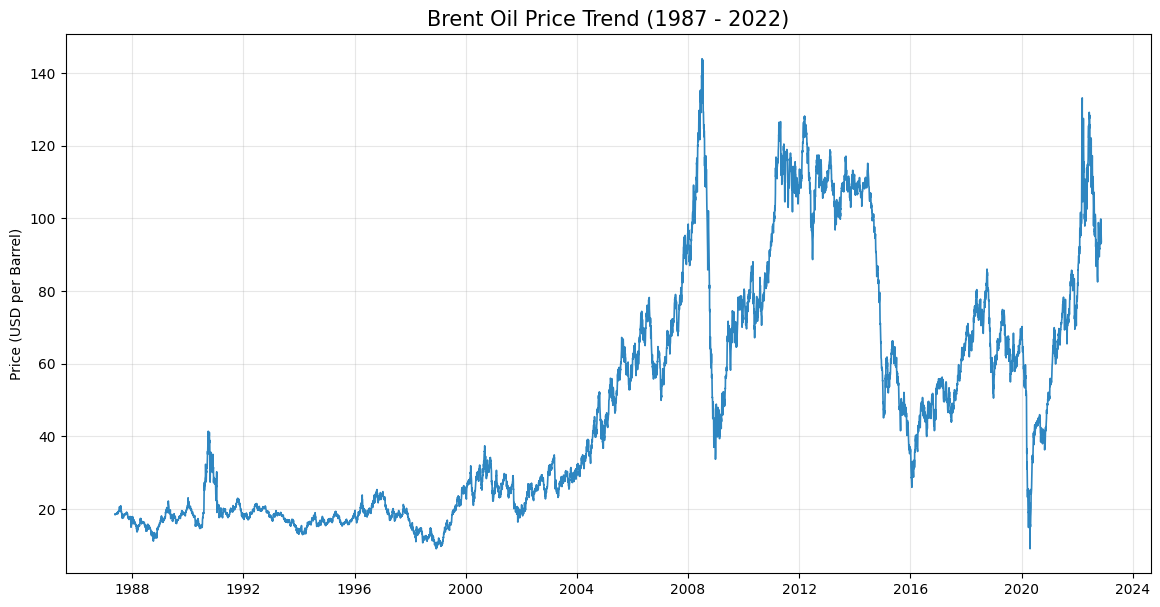

In [6]:
def plot_price_trend(df):
    """Plots the raw Price series to identify major trends and shocks."""
    plt.figure(figsize=(14, 7))
    plt.plot(df['Price'], color='#2E86C1', lw=1.2)
    plt.title('Brent Oil Price Trend (1987 - 2022)', fontsize=15)
    plt.ylabel('Price (USD per Barrel)')
    plt.grid(True, alpha=0.3)
    plt.show()

if brent_df is not None:
    plot_price_trend(brent_df)

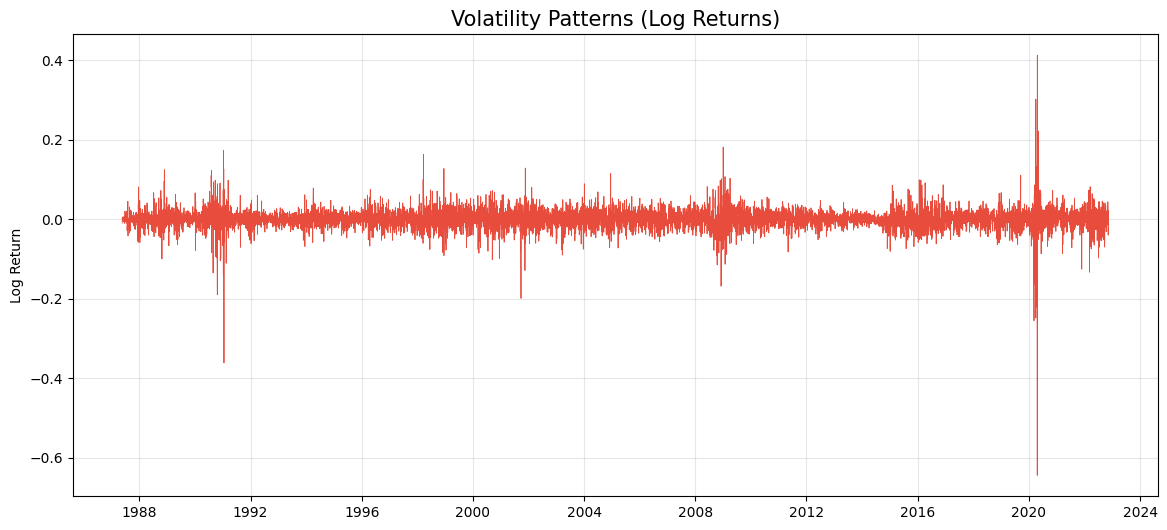

In [7]:
def analyze_volatility(df):
    """Calculates and plots log returns to observe volatility patterns."""
    # Log Returns formula: log(price_t) - log(price_{t-1})
    df['Log_Returns'] = np.log(df['Price'] / df['Price'].shift(1))
    
    plt.figure(figsize=(14, 6))
    plt.plot(df['Log_Returns'], color='#E74C3C', lw=0.6)
    plt.title('Volatility Patterns (Log Returns)', fontsize=15)
    plt.ylabel('Log Return')
    plt.grid(True, alpha=0.3)
    plt.show()
    return df

if brent_df is not None:
    brent_df = analyze_volatility(brent_df)

In [8]:
def perform_stationarity_test(series):
    """Runs the Augmented Dickey-Fuller (ADF) test for stationarity."""
    print("--- Augmented Dickey-Fuller (ADF) Test ---")
    result = adfuller(series.dropna())
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    
    # Interpretation based on your specific results
    if result[1] > 0.05:
        print(f"\nConclusion: p-value ({result[1]:.3f}) > 0.05.")
        print("The series is NON-STATIONARY. This informs our choice to use a ")
        print("Change Point model to identify structural breaks in the data.")
    else:
        print("\nConclusion: The series is stationary.")

if brent_df is not None:
    perform_stationarity_test(brent_df['Price'])

--- Augmented Dickey-Fuller (ADF) Test ---
ADF Statistic: -1.9939
p-value: 0.2893

Conclusion: p-value (0.289) > 0.05.
The series is NON-STATIONARY. This informs our choice to use a 
Change Point model to identify structural breaks in the data.
